In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("cancer_classification.csv")
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [4]:
# Rename the feature we are predicting to something more useful
#   class 0 means no cancer (benign)
#   class 1 means maligant cancer
data.columns = data.columns.str.replace("benign_0__mal_1", "class")

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
# There are a lot of strong negative correlated features with the class feature
data.corr()['class'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

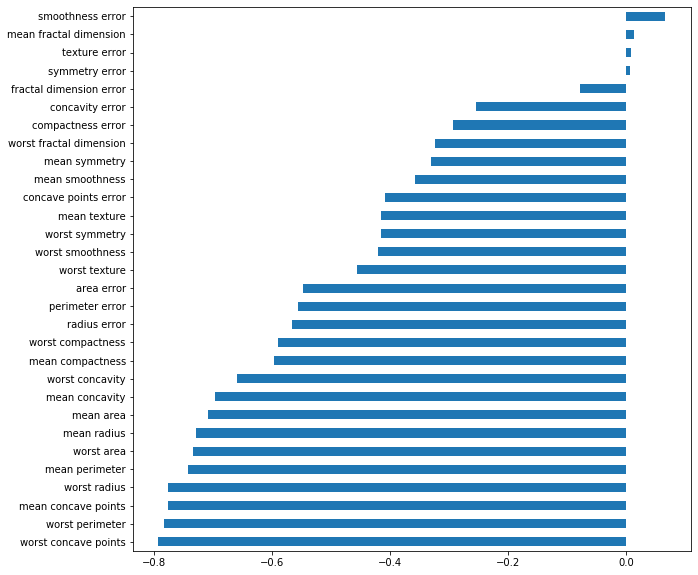

In [10]:
# Plot the correlations
plt.figure(figsize=(10, 10))
data.corr()['class'][:-1].sort_values().plot(kind="barh")

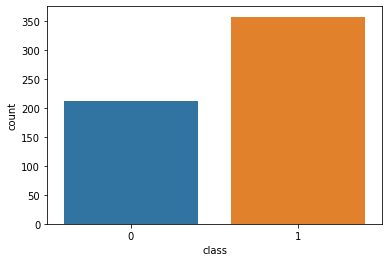

In [11]:
# Imabalnced class - there are more data with label 1 than label 0
# There should be an equal number of labelled data
sns.countplot(x="class", data=data)

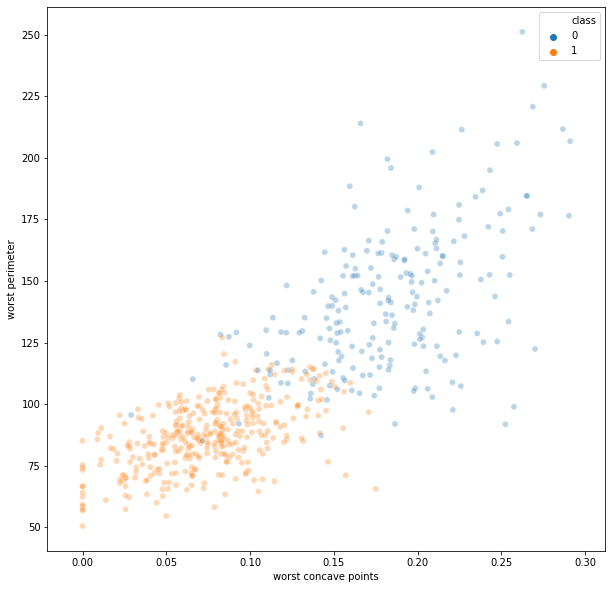

In [12]:
# The scatter plot below shows that we can separate the two classes of data
# That is, the higher the worst concave points, the worse the perimeter - so it is a benign cancer
# The lower the concave points, the smaller the perimeter; therefore, making this cancer spreadable
plt.figure(figsize=(10,10))
sns.scatterplot(x="worst concave points", y='worst perimeter', hue="class", data=data, alpha=.3)

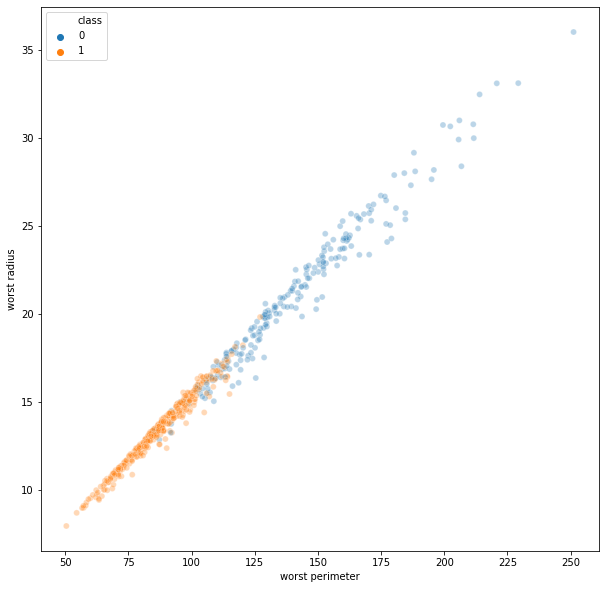

In [13]:

plt.figure(figsize=(10,10))
sns.scatterplot(x="worst perimeter", y='worst radius', hue="class", data=data, alpha=.3)

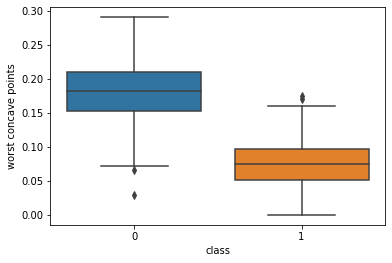

In [14]:
sns.boxplot(x="class", y="worst concave points", data=data)

In [15]:
# Let's prepare the data for classification
X = data.drop('class', axis=1).values
y = data['class'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(X_train.shape) # 389 data for training
print(X_test.shape)  # 171 data for testing

(398, 30)
(171, 30)


In [17]:
# Build the ANN for prediction

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [18]:
# Train the data

model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))


Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 639us/sample - loss: 0.9102 - val_loss: 0.6695
Epoch 2/600
398/398 [==============================] - 0s 60us/sample - loss: 0.6143 - val_loss: 0.4740
Epoch 3/600
398/398 [==============================] - 0s 52us/sample - loss: 0.4734 - val_loss: 0.3805
Epoch 4/600
398/398 [==============================] - 0s 50us/sample - loss: 0.3973 - val_loss: 0.3272
Epoch 5/600
398/398 [==============================] - 0s 53us/sample - loss: 0.3461 - val_loss: 0.2898
Epoch 6/600
398/398 [==============================] - 0s 50us/sample - loss: 0.3043 - val_loss: 0.2575
Epoch 7/600
398/398 [==============================] - 0s 49us/sample - loss: 0.2674 - val_loss: 0.2294
Epoch 8/600
398/398 [==============================] - 0s 53us/sample - loss: 0.2346 - val_loss: 0.2032
Epoch 9/600
398/398 [==============================] - 0s 47us/sample - loss: 0.2041 - val_loss: 0.1772
Epoch 10/600
398/

398/398 [==============================] - 0s 48us/sample - loss: 0.0014 - val_loss: 0.1869
Epoch 156/600
398/398 [==============================] - 0s 49us/sample - loss: 0.0014 - val_loss: 0.1878
Epoch 157/600
398/398 [==============================] - 0s 50us/sample - loss: 0.0013 - val_loss: 0.1909
Epoch 158/600
398/398 [==============================] - 0s 49us/sample - loss: 0.0014 - val_loss: 0.1932
Epoch 159/600
398/398 [==============================] - 0s 50us/sample - loss: 0.0013 - val_loss: 0.1949
Epoch 160/600
398/398 [==============================] - 0s 51us/sample - loss: 0.0013 - val_loss: 0.1936
Epoch 161/600
398/398 [==============================] - 0s 47us/sample - loss: 0.0013 - val_loss: 0.1932
Epoch 162/600
398/398 [==============================] - 0s 53us/sample - loss: 0.0012 - val_loss: 0.1949
Epoch 163/600
398/398 [==============================] - 0s 49us/sample - loss: 0.0012 - val_loss: 0.1959
Epoch 164/600
398/398 [==============================] - 0s 

398/398 [==============================] - 0s 49us/sample - loss: 1.3784e-04 - val_loss: 0.2802
Epoch 305/600
398/398 [==============================] - 0s 52us/sample - loss: 1.3607e-04 - val_loss: 0.2797
Epoch 306/600
398/398 [==============================] - 0s 55us/sample - loss: 1.3526e-04 - val_loss: 0.2794
Epoch 307/600
398/398 [==============================] - 0s 58us/sample - loss: 1.3408e-04 - val_loss: 0.2801
Epoch 308/600
398/398 [==============================] - 0s 52us/sample - loss: 1.3010e-04 - val_loss: 0.2798
Epoch 309/600
398/398 [==============================] - 0s 50us/sample - loss: 1.3233e-04 - val_loss: 0.2804
Epoch 310/600
398/398 [==============================] - 0s 50us/sample - loss: 1.3011e-04 - val_loss: 0.2821
Epoch 311/600
398/398 [==============================] - 0s 51us/sample - loss: 1.2780e-04 - val_loss: 0.2827
Epoch 312/600
398/398 [==============================] - 0s 54us/sample - loss: 1.2732e-04 - val_loss: 0.2832
Epoch 313/600
398/398 [=

398/398 [==============================] - 0s 50us/sample - loss: 3.0643e-05 - val_loss: 0.3346
Epoch 453/600
398/398 [==============================] - 0s 52us/sample - loss: 3.0635e-05 - val_loss: 0.3343
Epoch 454/600
398/398 [==============================] - 0s 49us/sample - loss: 2.9722e-05 - val_loss: 0.3356
Epoch 455/600
398/398 [==============================] - 0s 50us/sample - loss: 2.9162e-05 - val_loss: 0.3363
Epoch 456/600
398/398 [==============================] - 0s 49us/sample - loss: 3.0009e-05 - val_loss: 0.3362
Epoch 457/600
398/398 [==============================] - 0s 51us/sample - loss: 2.8707e-05 - val_loss: 0.3359
Epoch 458/600
398/398 [==============================] - 0s 51us/sample - loss: 2.8553e-05 - val_loss: 0.3364
Epoch 459/600
398/398 [==============================] - 0s 53us/sample - loss: 2.8245e-05 - val_loss: 0.3363
Epoch 460/600
398/398 [==============================] - 0s 50us/sample - loss: 2.8246e-05 - val_loss: 0.3360
Epoch 461/600
398/398 [=

398/398 [==============================] - 0s 53us/sample - loss: 8.2867e-06 - val_loss: 0.3720


In [19]:
model_loss_history = pd.DataFrame(model.history.history)
model_loss_history

,loss,val_loss
0,0.910197,0.669531
1,0.614322,0.474026
2,0.473429,0.380477
3,0.397296,0.327245
4,0.346087,0.289847
...,...,...
595,0.000009,0.372750
596,0.000008,0.372575
597,0.000008,0.372904
598,0.000008,0.373180


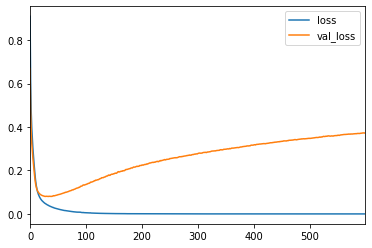

In [20]:
# An example of overfitting because the validation loss increase
# and training loss decrease

# This tells us that our model is overfitting to our training dataset
# The validation loss increases instead of decreasing!
model_loss_history.plot()

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [22]:
# Fix the overfitting problem 

from tensorflow.keras.callbacks import EarlyStopping

# The mode parameter can take in two values
#      min -> when we are trying to minimise the loss
#      max -> when we are trying to maximiuse the accuracy

# patience: Number of epochs with no improvement
#           after which training will be stopped.

early_stop = EarlyStopping(monitor="val_loss", mode='min', verbose=1, patience=25)


model_fixed = Sequential()
model_fixed.add(Dense(30, activation="relu"))
model_fixed.add(Dense(15, activation="relu"))
model_fixed.add(Dense(1, activation="sigmoid"))

model_fixed.compile(loss="binary_crossentropy", optimizer="adam")

model_fixed.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/300
398/398 [==============================] - 0s 639us/sample - loss: 0.6663 - val_loss: 0.5501
Epoch 2/300
398/398 [==============================] - 0s 55us/sample - loss: 0.4957 - val_loss: 0.4008
Epoch 3/300
398/398 [==============================] - 0s 55us/sample - loss: 0.3713 - val_loss: 0.2974
Epoch 4/300
398/398 [==============================] - 0s 63us/sample - loss: 0.2861 - val_loss: 0.2287
Epoch 5/300
398/398 [==============================] - 0s 57us/sample - loss: 0.2290 - val_loss: 0.1836
Epoch 6/300
398/398 [==============================] - 0s 60us/sample - loss: 0.1885 - val_loss: 0.1542
Epoch 7/300
398/398 [==============================] - 0s 59us/sample - loss: 0.1602 - val_loss: 0.1336
Epoch 8/300
398/398 [==============================] - 0s 53us/sample - loss: 0.1384 - val_loss: 0.1196
Epoch 9/300
398/398 [==============================] - 0s 57us/sample - loss: 0.1209 - val_loss: 0.1089
Epoch 10/300
398/

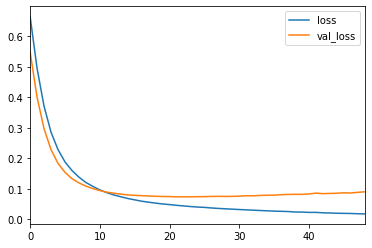

In [23]:
# A much better improved model
# The EarlyStop gets triggered when the validation loss increases to prevent overfitting
model_fixed_history = pd.DataFrame(model_fixed.history.history)
model_fixed_history.plot()

In [24]:
from tensorflow.keras.layers import Dropout

early_stop = EarlyStopping(monitor="val_loss", mode='min', verbose=1, patience=25)

model_fixed = Sequential()
model_fixed.add(Dense(30, activation="relu"))

# 50% chance of setting the inputs to 0
model_fixed.add(Dropout(0.5)) # The rate defines the percentage of the neurons that will be shut off

model_fixed.add(Dense(15, activation="relu"))
model_fixed.add(Dropout(0.5))

model_fixed.add(Dense(1, activation="sigmoid"))

model_fixed.compile(loss="binary_crossentropy", optimizer="adam")

model_fixed.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/300
398/398 [==============================] - 0s 902us/sample - loss: 0.6740 - val_loss: 0.4406
Epoch 2/300
398/398 [==============================] - 0s 58us/sample - loss: 0.6240 - val_loss: 0.3649
Epoch 3/300
398/398 [==============================] - 0s 56us/sample - loss: 0.4924 - val_loss: 0.3163
Epoch 4/300
398/398 [==============================] - 0s 59us/sample - loss: 0.4963 - val_loss: 0.2789
Epoch 5/300
398/398 [==============================] - 0s 52us/sample - loss: 0.4291 - val_loss: 0.2486
Epoch 6/300
398/398 [==============================] - 0s 60us/sample - loss: 0.3928 - val_loss: 0.2254
Epoch 7/300
398/398 [==============================] - 0s 58us/sample - loss: 0.3855 - val_loss: 0.2046
Epoch 8/300
398/398 [==============================] - 0s 57us/sample - loss: 0.3869 - val_loss: 0.1869
Epoch 9/300
398/398 [==============================] - 0s 59us/sample - loss: 0.3206 - val_loss: 0.1731
Epoch 10/300
398/

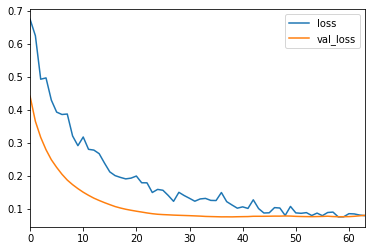

In [25]:
# View the loss after adding dropouts and early stop
model_fixed_history = pd.DataFrame(model_fixed.history.history)
model_fixed_history.plot()

In [26]:
y_pred = model_fixed.predict_classes(X_test)
y_pred

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [27]:
# The result below shows that the overfitting has disappeared now
# The performance is much better because there is no overfitting

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.99      0.98      0.99       111

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 59   1]
 [  2 109]]
0.9824561403508771


In [28]:
# Build the ANN for prediction using the accuracy as the metric
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/200
398/398 [==============================] - 0s 665us/sample - loss: 0.7083 - accuracy: 0.5352 - val_loss: 0.5681 - val_accuracy: 0.7310
Epoch 2/200
398/398 [==============================] - 0s 55us/sample - loss: 0.4916 - accuracy: 0.8166 - val_loss: 0.4064 - val_accuracy: 0.9357
Epoch 3/200
398/398 [==============================] - 0s 59us/sample - loss: 0.3600 - accuracy: 0.9322 - val_loss: 0.3057 - val_accuracy: 0.9532
Epoch 4/200
398/398 [==============================] - 0s 58us/sample - loss: 0.2786 - accuracy: 0.9372 - val_loss: 0.2387 - val_accuracy: 0.9415
Epoch 5/200
398/398 [==============================] - 0s 57us/sample - loss: 0.2244 - accuracy: 0.9497 - val_loss: 0.1940 - val_accuracy: 0.9591
Epoch 6/200
398/398 [==============================] - 0s 58us/sample - loss: 0.1871 - accuracy: 0.9548 - val_loss: 0.1639 - val_accuracy: 0.9649
Epoch 7/200
398/398 [==============================] - 0s 55us/sample - loss:

Epoch 112/200
398/398 [==============================] - 0s 88us/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1209 - val_accuracy: 0.9883
Epoch 113/200
398/398 [==============================] - 0s 75us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1210 - val_accuracy: 0.9883
Epoch 114/200
398/398 [==============================] - 0s 63us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1222 - val_accuracy: 0.9883
Epoch 115/200
398/398 [==============================] - 0s 50us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1229 - val_accuracy: 0.9883
Epoch 116/200
398/398 [==============================] - 0s 53us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy: 0.9883
Epoch 117/200
398/398 [==============================] - 0s 58us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1241 - val_accuracy: 0.9883
Epoch 118/200
398/398 [==============================] - 0s 54us/sample - loss: 0.0025 - accuracy: 1.0000 - val_

398/398 [==============================] - 0s 58us/sample - loss: 7.9998e-04 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9825
Epoch 168/200
398/398 [==============================] - 0s 58us/sample - loss: 7.7444e-04 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.9825
Epoch 169/200
398/398 [==============================] - 0s 57us/sample - loss: 7.7466e-04 - accuracy: 1.0000 - val_loss: 0.1503 - val_accuracy: 0.9825
Epoch 170/200
398/398 [==============================] - 0s 58us/sample - loss: 7.5961e-04 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.9825
Epoch 171/200
398/398 [==============================] - 0s 55us/sample - loss: 7.5307e-04 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.9825
Epoch 172/200
398/398 [==============================] - 0s 59us/sample - loss: 7.4865e-04 - accuracy: 1.0000 - val_loss: 0.1512 - val_accuracy: 0.9825
Epoch 173/200
398/398 [==============================] - 0s 57us/sample - loss: 7.2805e-04 - accuracy:

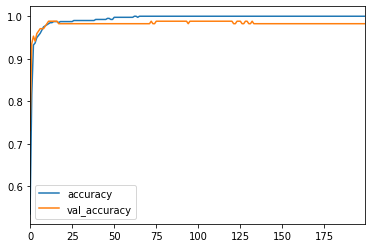

In [29]:
# Another example of overfitting because the training accuracy increases, while the validation data accuracy decreases
model_history = pd.DataFrame(model.history.history)
model_history.drop(['loss', 'val_loss'], axis=1, inplace=True)
model_history.plot()

In [30]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='accuracy', mode="max", patience=25)

model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/200
398/398 [==============================] - 0s 804us/sample - loss: 1.1137 - accuracy: 0.2965 - val_loss: 0.9100 - val_accuracy: 0.1404
Epoch 2/200
398/398 [==============================] - 0s 60us/sample - loss: 0.9379 - accuracy: 0.3543 - val_loss: 0.7457 - val_accuracy: 0.3860
Epoch 3/200
398/398 [==============================] - 0s 64us/sample - loss: 0.8126 - accuracy: 0.4749 - val_loss: 0.6360 - val_accuracy: 0.7193
Epoch 4/200
398/398 [==============================] - 0s 61us/sample - loss: 0.6543 - accuracy: 0.5980 - val_loss: 0.5519 - val_accuracy: 0.8713
Epoch 5/200
398/398 [==============================] - 0s 61us/sample - loss: 0.6187 - accuracy: 0.6457 - val_loss: 0.4785 - val_accuracy: 0.9357
Epoch 6/200
398/398 [==============================] - 0s 62us/sample - loss: 0.5418 - accuracy: 0.7186 - val_loss: 0.4186 - val_accuracy: 0.9415
Epoch 7/200
398/398 [==============================] - 0s 60us/sample - loss:

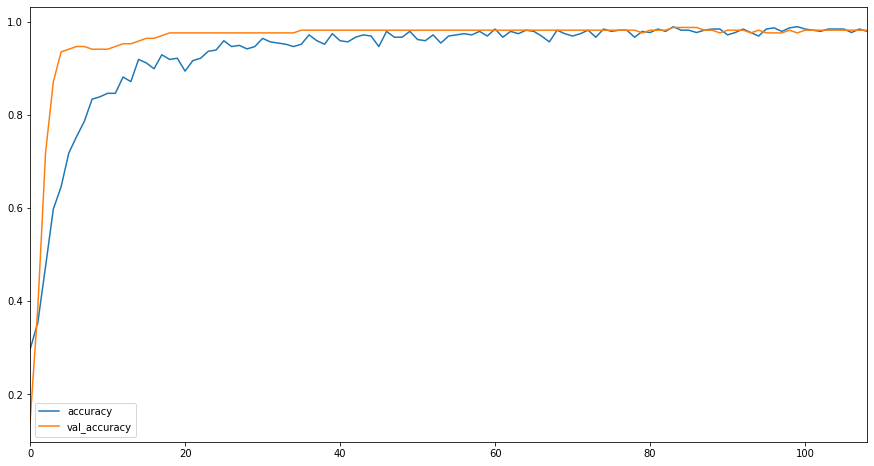

In [31]:
model_history = pd.DataFrame(model.history.history)
model_history.drop(['loss', 'val_loss'], inplace=True, axis=1)
model_history.plot(figsize=(15, 8))

In [32]:
y_pred = model.predict_classes(X_test)
# The result below shows that the overfitting has disappeared now
# The performance is much better because there is no overfitting

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.99      0.98      0.99       111

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 59   1]
 [  2 109]]
0.9824561403508771
